## Random Forecast

Random Forest is a versatile and robust machine learning algorithm that operates by constructing numerious decision trees during the training phase and outputting the mode of the classification of all trees. This ensemble method improves prediction accuracy by averaging or taking the majority rule across the results of all trees, significantly reducing the risk of overfitting which is common in single decision trees.

Using Random Forest for classification on heart disease, as in the dataset provided, offers several advantages. First, it can handle the complexities and potential interactions between features in the dataset without requiring explicit modeling of these interactions. In addition, this algorithm provides important insights into feature importance and identifying which factors contribute most to heart disease risk. Given these strengths, Random Forest is particularly suitable for medical diagnostics, where reliable and interpretable results are crucial for making informed treatment decisions.

### Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the data

In [2]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


### Data preprocessing

In [8]:
# Split the data into features and target variable
X = data.drop('target', axis=1)
y = data['target']
features = X.columns

The dataset used includes several predictive features related to heart disease, which was split into training and testing subsets with 70% of the data used for training and the remaining 30% for testing.

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Random Forecast model setup

The model was initialized with 100 trees (n_estimators=100). The Random Forest model was trained on the training data and used to make predictions on the testing set.

In [ ]:
start_time = time.time()

In [10]:
# Initialize the RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=123)

In [11]:
# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Random forest model fitting time: {elapsed_time:.3f} seconds")

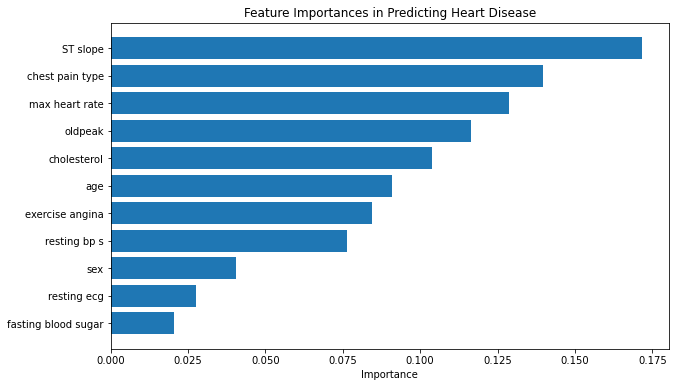

In [12]:
# Get feature importances
importances = random_forest_model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Predicting Heart Disease')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important at the top
plt.show()

The above plot shows the importance of each feature.

### Predictive Performance

The predictive probabilities of heart disease were also visualized, showing the distribution of predicted probabilities for the testing set.

In [13]:
# Predict on the test data
y_pred = random_forest_model.predict(X_test)

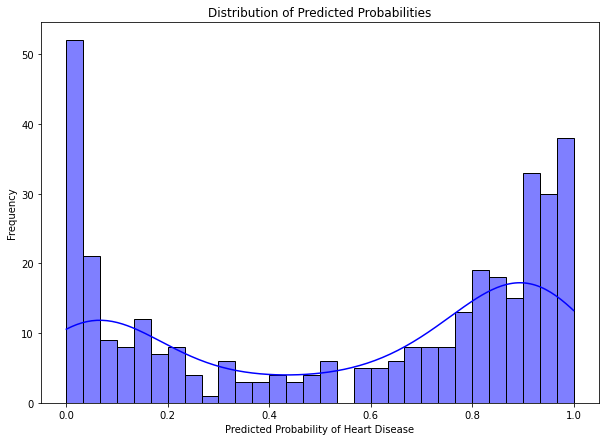

In [14]:
# Predictive checks plot
probs = random_forest_model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 7))
sns.histplot(probs, bins=30, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Heart Disease')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 91.32%
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       149
           1       0.92      0.93      0.93       208

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357



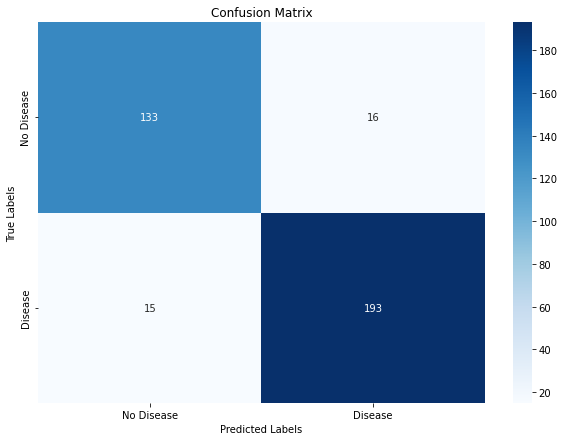

In [18]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Conclusion

The accuracy (91.32%) and detailed metrics provided by the confusion matrix and classification report indicate that the model performs well in distinguishing between patients with and without heart disease. This model's strength lies in its ability to manage a high-dimensional space and deliver more reliable predictions than Bayesian logistic Lasso regression model, making it a valuable tool in medical diagnostic processes.